In [37]:
from pymongo import MongoClient
import pandas as pd
import numpy as np
import random

#used if i need wildcard in bs
import re

import time
import pprint

import matplotlib.pyplot as plt

In [2]:
client = MongoClient('localhost', 27017)
db = client['scraper']
whole_page_ratings = db['whole_page_rt']
rt_ratings = db['rt_ratings']

In [29]:
rt_pd = pd.DataFrame(list(rt_ratings.find()))

In [30]:
rt_pd.tail(100)

,_id,rotten_tomato_rating,audience_rating,director,writers,top_5_billed,title
1266,5f1779aaeec2a42d5d9ccc90,70%,82%,[Written By:Justin B. Rhodes],"[In Theaters:Nov 1, 2019 wide]","[Linda Hamilton , Aaron KunitzArnold Schwarzen...",Terminator: Dark Fate
1267,5f1779b4eec2a42d5d9ccc91,57%,94%,[Guy Ritchie],"[John August, Guy Ritchie]","[Will Smith , Mena Massoud , Naomi Scott , Mar...",Aladdin
1268,5f1779baeec2a42d5d9ccc92,93%,87%,[Taika Waititi],[Eric Pearson],"[Chris Hemsworth , Tom Hiddleston , Mark Ruffa...",Thor: Ragnarok
1269,5f1779c8eec2a42d5d9ccc93,53%,70%,[Robert Stromberg],[Linda Woolverton],"[Angelina Jolie , Sharlto Copley , Elle Fannin...",Maleficent
1270,5f1779d8eec2a42d5d9ccc94,74%,79%,[David Yates (II)],"[J.K. Rowling, J.K. Rowling]","[Eddie Redmayne , Katherine Waterston , , , Ja...",Fantastic Beasts and Where to Find Them
...,...,...,...,...,...,...,...
1361,5f177e11eec2a42d5d9cccef,91%,89%,[Anthony Russo],"[Christopher Markus, Stephen McFeely]","[Chris Evans , Robert Downey Jr. , Scarlett Jo...",Captain America: Civil War
1362,5f177e1feec2a42d5d9cccf0,83%,78%,[David Yates (II)],[Steve Kloves],"[Daniel Radcliffe , Emma Watson , Rupert Grint...",Harry Potter and the Half-Blood Prince
1363,5f177e2feec2a42d5d9cccf1,74%,85%,[Peter Jackson],"[Guillermo del Toro, Peter Jackson, Fran Wal...","[Ian McKellen , Martin Freeman , Richard Armit...",The Hobbit: The Desolation of Smaug
1364,5f177e3beec2a42d5d9cccf2,59%,74%,[Peter Jackson],"[Fran Walsh, Philippa Boyens, Guillermo del ...","[Martin Freeman , Ian McKellen , , Thorin Oake...",The Hobbit: The Battle of the Five Armies


In [39]:
budgets_pd = pd.read_csv('data/budgets_pd.csv')

In [40]:
budgets_pd.tail(10)

,_id,date,title,budget,domestic_gross,worldwide_gross
6033,5f17b5918fbba2e9aaf44118,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584"
6034,5f17b5918fbba2e9aaf44119,"Feb 26, 1993",El Mariachi,"$7,000","$2,040,920","$2,041,928"
6035,5f17b5918fbba2e9aaf4411a,"Oct 8, 2004",Primer,"$7,000","$424,760","$841,926"
6036,5f17b5918fbba2e9aaf4411b,"May 26, 2006",Cavite,"$7,000","$70,071","$71,644"
6037,5f17b5918fbba2e9aaf4411c,Unknown,The Mongol King,"$7,000",$900,$900
6038,5f17b5918fbba2e9aaf4411d,Unknown,Red 11,"$7,000",$0,$0
6039,5f17b5918fbba2e9aaf4411e,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
6040,5f17b5918fbba2e9aaf4411f,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
6041,5f17b5918fbba2e9aaf44120,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
6042,5f17b5918fbba2e9aaf44121,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [ ]:
# graphs/plots
# 1 histogram of budgets
# budget vs critic rating
# budget vs audience rating
# maybe counts of oscar actors in movies >90% rated
# maybe counts of oscar directors in movies >90%
# maybe counts of oscar writers in movies >90%

In [41]:
merged_db = pd.merge(rt_pd, budgets_pd, on='title')

In [42]:
merged_db.head()

,_id_x,rotten_tomato_rating,audience_rating,director,writers,top_5_billed,title,_id_y,date,budget,domestic_gross,worldwide_gross
0,5f173e2ceec2a42d5d9cc7a1,94%,90%,[Anthony Russo],"[Christopher Markus, Stephen McFeely]","[Robert Downey Jr. , Mark Ruffalo , Scarlett J...",Avengers: Endgame,5f17b39c8fbba2e9aaf4294b,"Apr 23, 2019","$400,000,000","$858,373,000","$2,797,800,564"
1,5f1741c1eec2a42d5d9cc7ec,94%,90%,[Anthony Russo],"[Christopher Markus, Stephen McFeely]","[Robert Downey Jr. , Mark Ruffalo , Scarlett J...",Avengers: Endgame,5f17b39c8fbba2e9aaf4294b,"Apr 23, 2019","$400,000,000","$858,373,000","$2,797,800,564"
2,5f17454eeec2a42d5d9cc837,94%,90%,[Anthony Russo],"[Christopher Markus, Stephen McFeely]","[Robert Downey Jr. , Mark Ruffalo , Scarlett J...",Avengers: Endgame,5f17b39c8fbba2e9aaf4294b,"Apr 23, 2019","$400,000,000","$858,373,000","$2,797,800,564"
3,5f1748dbeec2a42d5d9cc882,94%,90%,[Anthony Russo],"[Christopher Markus, Stephen McFeely]","[Robert Downey Jr. , Mark Ruffalo , Scarlett J...",Avengers: Endgame,5f17b39c8fbba2e9aaf4294b,"Apr 23, 2019","$400,000,000","$858,373,000","$2,797,800,564"
4,5f174c59eec2a42d5d9cc8cd,94%,90%,[Anthony Russo],"[Christopher Markus, Stephen McFeely]","[Robert Downey Jr. , Mark Ruffalo , Scarlett J...",Avengers: Endgame,5f17b39c8fbba2e9aaf4294b,"Apr 23, 2019","$400,000,000","$858,373,000","$2,797,800,564"


In [62]:
merged_df = merged_db[['title', 'date', 'rotten_tomato_rating', 'audience_rating', 'budget', 'domestic_gross', 'worldwide_gross', 'director', 'writers', 'top_5_billed']]

In [45]:
merged_df.head()

,title,date,rotten_tomato_rating,audience_rating,budget,domestic_gross,worldwide_gross,director,writers,top_5_billed
0,Avengers: Endgame,"Apr 23, 2019",94%,90%,"$400,000,000","$858,373,000","$2,797,800,564",[Anthony Russo],"[Christopher Markus, Stephen McFeely]","[Robert Downey Jr. , Mark Ruffalo , Scarlett J..."
1,Avengers: Endgame,"Apr 23, 2019",94%,90%,"$400,000,000","$858,373,000","$2,797,800,564",[Anthony Russo],"[Christopher Markus, Stephen McFeely]","[Robert Downey Jr. , Mark Ruffalo , Scarlett J..."
2,Avengers: Endgame,"Apr 23, 2019",94%,90%,"$400,000,000","$858,373,000","$2,797,800,564",[Anthony Russo],"[Christopher Markus, Stephen McFeely]","[Robert Downey Jr. , Mark Ruffalo , Scarlett J..."
3,Avengers: Endgame,"Apr 23, 2019",94%,90%,"$400,000,000","$858,373,000","$2,797,800,564",[Anthony Russo],"[Christopher Markus, Stephen McFeely]","[Robert Downey Jr. , Mark Ruffalo , Scarlett J..."
4,Avengers: Endgame,"Apr 23, 2019",94%,90%,"$400,000,000","$858,373,000","$2,797,800,564",[Anthony Russo],"[Christopher Markus, Stephen McFeely]","[Robert Downey Jr. , Mark Ruffalo , Scarlett J..."


In [71]:
merged_df.drop_duplicates(subset="title", inplace=True)

/Users/Michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 1436
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   title                 75 non-null     object
 1   date                  75 non-null     object
 2   rotten_tomato_rating  75 non-null     object
 3   audience_rating       75 non-null     object
 4   budget                75 non-null     object
 5   domestic_gross        75 non-null     object
 6   worldwide_gross       75 non-null     object
 7   director              75 non-null     object
 8   writers               75 non-null     object
 9   top_5_billed          75 non-null     object
dtypes: object(10)
memory usage: 6.4+ KB


In [54]:
convert_dict = {'rotten_tomato_rating':int, 'audience_rating':int, 'budget':int, 'domestic_gross':int, 'worldwide_gross':int}

In [74]:
budgets = budgets_pd.budget.str.replace('$','')
domestic = budgets_pd.domestic_gross.str.replace('$','')
worldwide = budgets_pd.worldwide_gross.str.replace('$','')
rt_rating = merged_df.rotten_tomato_rating.str.replace('%','')
aud_rating = merged_df.audience_rating.str.replace('%','')

In [107]:
rt = rt_rating[::-1]

In [75]:
budgets

0        400,000,000
1        379,000,000
2        365,000,000
3        306,000,000
4        300,000,000
            ...     
6038           7,000
6039           6,000
6040           5,000
6041           1,400
6042           1,100
Name: budget, Length: 6043, dtype: object

In [108]:
b = budgets[:75]
b = b[::-1]

In [91]:
b.max()

'\xa0400,000,000'

(array([ 21.,  21.,  63.,  61.,  74.,  61.,  64.,  69.,  79., 133.,  75.,
        137., 155., 106., 263., 283., 223., 279., 318., 330., 141., 140.,
        196., 150., 215., 246.,  86., 131., 132.,  43., 144., 191., 165.,
         73., 151.,  63.,  28., 175.,  85., 200.,  31.,  43.,  33., 101.,
         85.,  47.,  45.,  18.,  41.,  29.]),
 array([  0. ,  10.5,  21. ,  31.5,  42. ,  52.5,  63. ,  73.5,  84. ,
         94.5, 105. , 115.5, 126. , 136.5, 147. , 157.5, 168. , 178.5,
        189. , 199.5, 210. , 220.5, 231. , 241.5, 252. , 262.5, 273. ,
        283.5, 294. , 304.5, 315. , 325.5, 336. , 346.5, 357. , 367.5,
        378. , 388.5, 399. , 409.5, 420. , 430.5, 441. , 451.5, 462. ,
        472.5, 483. , 493.5, 504. , 514.5, 525. ]),
 <a list of 50 Patch objects>)

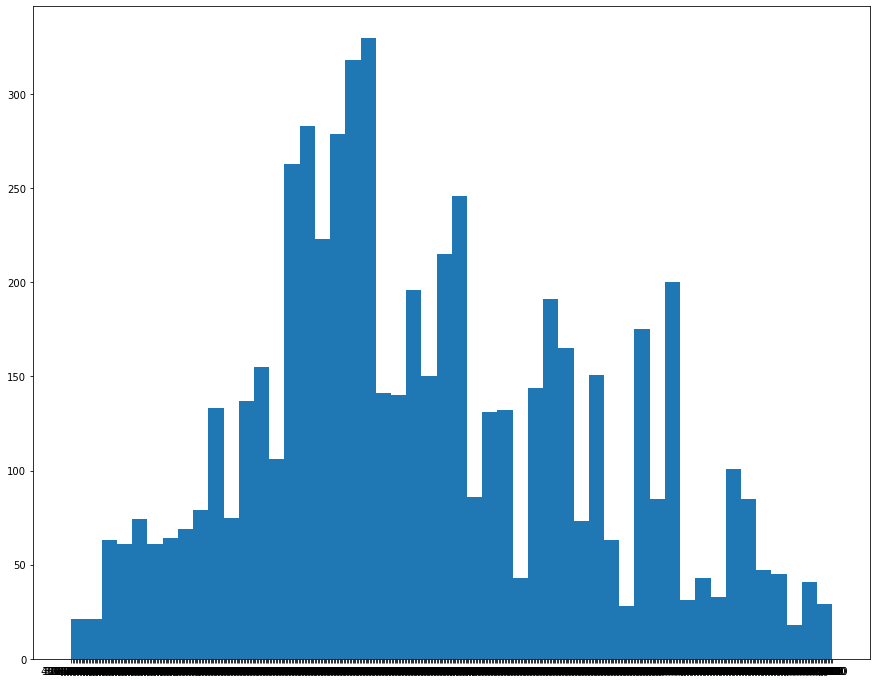

In [98]:
#budgets distribution
fig, ax = plt.subplots(figsize =(15,12))
ax.hist(budgets, 50)

In [127]:
_ = b.tolist()
blist = []
for num in _:
    num = num.replace('\xa0','')
    num = num.replace(',', '')
    blist.append(int(num))
print(blist)

[190000000, 195000000, 195000000, 195000000, 200000000, 200000000, 200000000, 200000000, 200000000, 200000000, 200000000, 200000000, 200000000, 200000000, 200000000, 200000000, 200000000, 200000000, 200000000, 200000000, 200000000, 200000000, 200000000, 200000000, 200000000, 200000000, 200000000, 200000000, 200000000, 200000000, 200000000, 200000000, 205000000, 207000000, 210000000, 210000000, 210000000, 210000000, 215000000, 215000000, 217000000, 220000000, 220000000, 224000000, 225000000, 225000000, 225000000, 225000000, 225000000, 230000000, 230000000, 230000000, 232000000, 237000000, 250000000, 250000000, 250000000, 250000000, 250000000, 250000000, 258000000, 260000000, 260000000, 263000000, 263700000, 275000000, 275000000, 300000000, 300000000, 300000000, 300000000, 306000000, 365000000, 379000000, 400000000]


In [130]:
_ = rt_rating.tolist()
print(_)
rtlist = []
for num in _:
#     num = num.replace('\xa0','')
#     num = num.replace(',', '')
     rtlist.append(int(num))
print(rtlist)

['94', '33', '76', '85', '51', '70', '52', '28', '93', '89', '91', '83', '74', '59', '67', '82', '75', '87', '30', '65', '31', '73', '34', '15', '70', '20', '18', '57', '84', '42', '89', '94', '84', '94', '97', '98', '79', '85', '92', '64', '80', '57', '90', '51', '39', '40', '36', '33', '26', '37', '23', '86', '35', '52', '82', '84', '66', '76', '94', '94', '78', '75', '86', '40', '88', '70', '57', '93', '53', '74', '95', '18', '36', '93', '48']
[94, 33, 76, 85, 51, 70, 52, 28, 93, 89, 91, 83, 74, 59, 67, 82, 75, 87, 30, 65, 31, 73, 34, 15, 70, 20, 18, 57, 84, 42, 89, 94, 84, 94, 97, 98, 79, 85, 92, 64, 80, 57, 90, 51, 39, 40, 36, 33, 26, 37, 23, 86, 35, 52, 82, 84, 66, 76, 94, 94, 78, 75, 86, 40, 88, 70, 57, 93, 53, 74, 95, 18, 36, 93, 48]


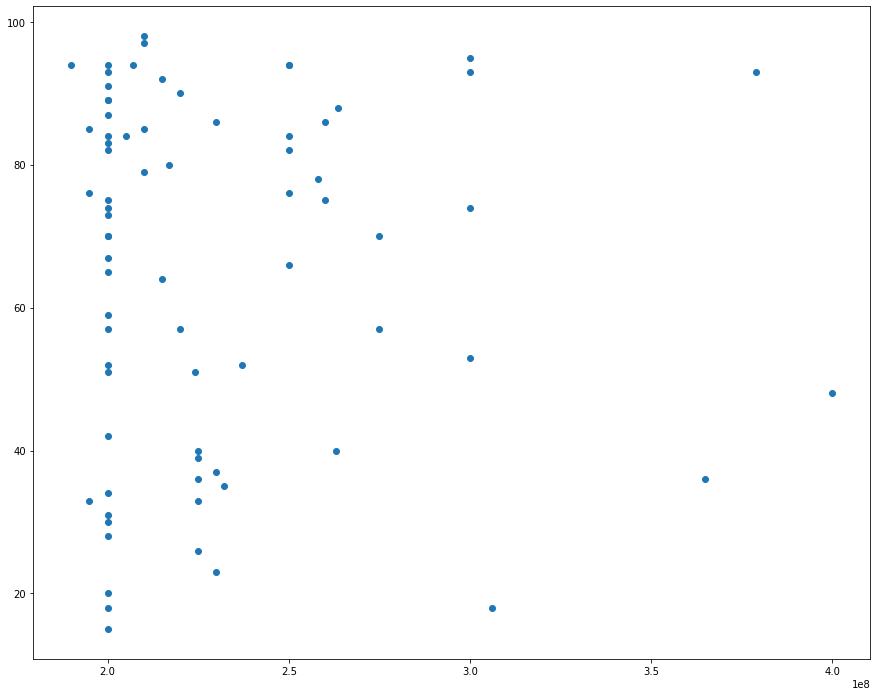

In [133]:

fig1, ax1 = plt.subplots(figsize=(15,12))
y =  range(0,100,5)
ax1.scatter(blist, rtlist)
# ax1.set_ylim([0,100])
# ax1.set_xlim([0, 100])